In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
from matplotlib.ticker import MaxNLocator

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob


In [7]:
ss = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_5179m_s02_t50.nc')

In [11]:
ss

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 51)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory        (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2019...
    lat               (traj, obs) float64 -32.19 -32.17 -32.12 ... -32.27 -32.38
    lon               (traj, obs) float64 6.307 6.366 6.402 ... 9.158 9.103
    z                 (traj, obs) float64 5.179e+03 5.187e+03 ... 5.008e+03
    cons_temperature  (traj, obs) float32 0.7166 0.7165 0.7192 ... 0.6473 0.6535
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 34.74 34.74
    mld               (traj, obs) float32 33.11 46.48 48.47 ... 51.34 54.09
    alpha             (traj, obs) float32 1e-06 1e-06 1e-06 ... 1e-06 1e-06
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

# Simulation 60 m

In [3]:
sim_60 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_60m_s02_t1800.nc')

In [20]:
aa = np.isnan(sim_60['abs_salinity'].where(cond=sim_60['abs_salinity'] < 1))

In [26]:
~aa

<xarray.DataArray 'abs_salinity' (traj: 100000, obs: 1801)>
array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

<xarray.DataArray 'abs_salinity' (traj: 100000, obs: 1801)>
array([[False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

In [31]:
sim_60['abs_salinity'][:,:]

<xarray.DataArray 'abs_salinity' (traj: 100000, obs: 1801)>
array([[ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56819 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       ...,
       [ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.575825, 35.56819 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56084 , ..., 34.504753, 34.492542,
        34.46985 ]], dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

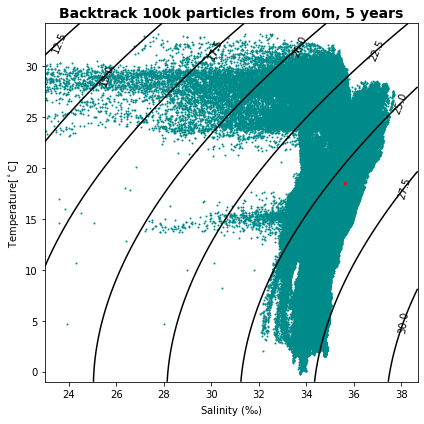

In [4]:
max_sal, min_sal = sim_60['abs_salinity'].max(), 24
max_temp, min_temp = sim_60['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

# for i in range(1000
plt.scatter(sim_60['abs_salinity'][1:, :], sim_60['cons_temperature'][1:, :], s=1, color='darkcyan');
plt.scatter(sim_60['abs_salinity'][0,1], sim_60['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 5 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()


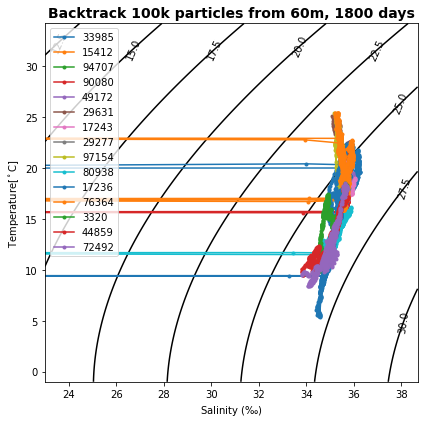

In [87]:
max_sal, min_sal = sim_60['abs_salinity'].max(), 24
max_temp, min_temp = sim_60['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

rand_traj = np.random.choice(100000, 15)
for i in rand_traj:
    traj = sim_60['abs_salinity'][i,1:]
    i_sal = sim_60['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_60['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);
    
cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()
plt.legend()

# simulation 5000 m

In [41]:
sim_5000 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_5179m_s02_t1800.nc')

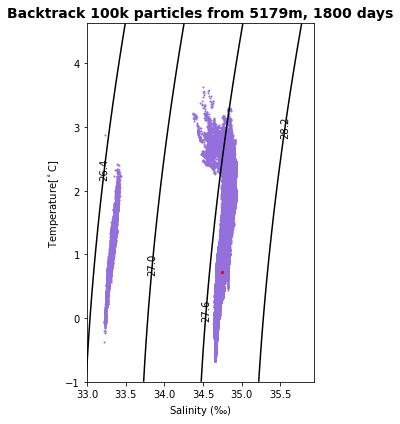

In [98]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

# for i in range(1000
plt.scatter(sim_5000['abs_salinity'][1:, :], sim_5000['cons_temperature'][1:, :], s=1, color='mediumpurple');
plt.scatter(sim_5000['abs_salinity'][0,1], sim_5000['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 5179m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()

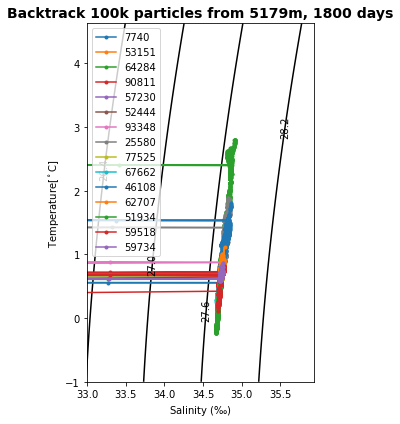

In [99]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

rand_traj = np.random.choice(100000, 15)
for i in rand_traj:
    traj = sim_5000['abs_salinity'][i,1:]
    i_sal = sim_5000['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_5000['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 5179m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()
plt.legend(loc = 'upper left')

### Find the bug

There might be a file for salinity that was g/kg units, and that is bringing the salinty to 0 at some points. Mission: Find which file it is.